## Data Processing Work and Visualizations

In this notebook I process the original dataset and create visualizations to help understand the data we are working with

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.express as px
import category_encoders as ce

In [24]:
df = pd.read_csv(r'C:\Users\jsull\UW Work\Stat 451\Project\betterspotify.csv') # load the data I got from kaggle
df = df.drop_duplicates(subset=['track_id']) # remove duplicate records from the data
df = df[df['genre'] != 'sleep'] # get rid of ambient sleep music from the data set
scaler = MinMaxScaler() # min-max scale the columns that are not yet in this format
columns_to_scale = ['loudness', 'tempo', 'duration_ms', 'popularity']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
# df['genre'] = df['genre'].replace(genre_mapping) # map genres to the generalized dictionary categories above
genres = df['genre']

encoder = ce.binary.BinaryEncoder(cols=['genre']) # binary encode the genre column
df = encoder.fit_transform(df)
df = pd.concat([df, genres], axis=1) # add the genre column back to the data frame

df = df.rename(columns={'Unnamed: 0': 'master_idx'}) # rename the index column
pop = df.pop('popularity') 
df.insert(5, "popularity", pop) # move the popularity column up for readability
df.head()

,master_idx,artist_name,track_name,track_id,year,popularity,genre_0,genre_1,genre_2,genre_3,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,2012,0.68,0,0,0,0,...,1,0.0429,0.6940,0.000000,0.1150,0.139,0.533639,0.041201,3,acoustic
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,2012,0.50,0,0,0,0,...,1,0.0258,0.4770,0.000014,0.0974,0.515,0.560744,0.037086,4,acoustic
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,2012,0.57,0,0,0,0,...,1,0.0323,0.3380,0.000050,0.0895,0.145,0.559344,0.027149,4,acoustic
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,2012,0.58,0,0,0,0,...,1,0.0363,0.8070,0.000000,0.0797,0.508,0.819867,0.052298,4,acoustic
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,2012,0.54,0,0,0,0,...,0,0.0302,0.0726,0.019300,0.1100,0.217,0.687475,0.041920,4,acoustic


In [26]:
# df.to_csv(r'C:\Users\jsull\UW Work\Stat 451\Project\processed_data.csv')

Data exploration

# Visualizations

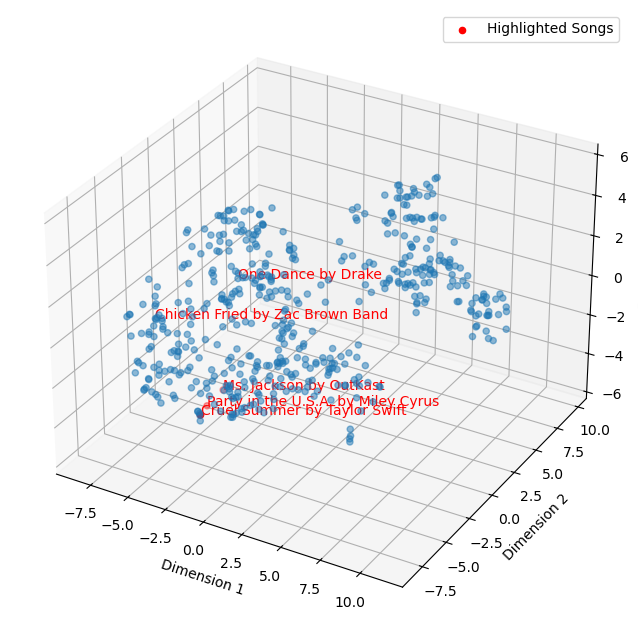

In [19]:
songs_to_highlight = {
    "Ms. Jackson": "OutKast",
    "Cruel Summer": "Taylor Swift",
    "Party in the U.S.A.": "Miley Cyrus",
    "One Dance": "Drake",
    "Chicken Fried": "Zac Brown Band"
}

floats = df.select_dtypes(include=[float]).columns

highlight_mask = df.apply(lambda x: (x['track_name'], x['artist_name']) in songs_to_highlight.items(), axis=1)
highlighted_songs = df[highlight_mask]

other_songs = df[~highlight_mask].sample(n=500 - len(highlighted_songs))

b = pd.concat([highlighted_songs, other_songs])

model = TSNE(n_components=3, random_state=0)
tsne_data = model.fit_transform(b[floats])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tsne_data[len(highlighted_songs):, 0], tsne_data[len(highlighted_songs):, 1], tsne_data[len(highlighted_songs):, 2], alpha=0.5)

ax.scatter(tsne_data[:len(highlighted_songs), 0], tsne_data[:len(highlighted_songs), 1], tsne_data[:len(highlighted_songs), 2], c='r', label='Highlighted Songs')

for i, (song, artist) in enumerate(songs_to_highlight.items()):
    ax.text(tsne_data[i, 0], tsne_data[i, 1], tsne_data[i, 2], f'{song} by {artist}', color='red')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

ax.legend()

plt.show()

Below is an interactive 3D plot of the TSNE dimensionality reduction of the data.

In [22]:
model = TSNE(n_components=3, random_state=0)
tsne_data = model.fit_transform(b[floats])

# Convert the resulting t-SNE output into a DataFrame for easier plotting
tsne_df = pd.DataFrame(tsne_data, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])

# Create an interactive 3D scatter plot
fig = px.scatter_3d(tsne_df, x='Dimension 1', y='Dimension 2', z='Dimension 3',
                    title='3D t-SNE Visualization',
                    labels={'Dimension 1': 'Dimension 1', 'Dimension 2': 'Dimension 2', 'Dimension 3': 'Dimension 3'})

fig.show()

Finally I have plotted the distributions of each numeric column I use.

c:\Users\jsull\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jsull\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jsull\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jsull\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jsull\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

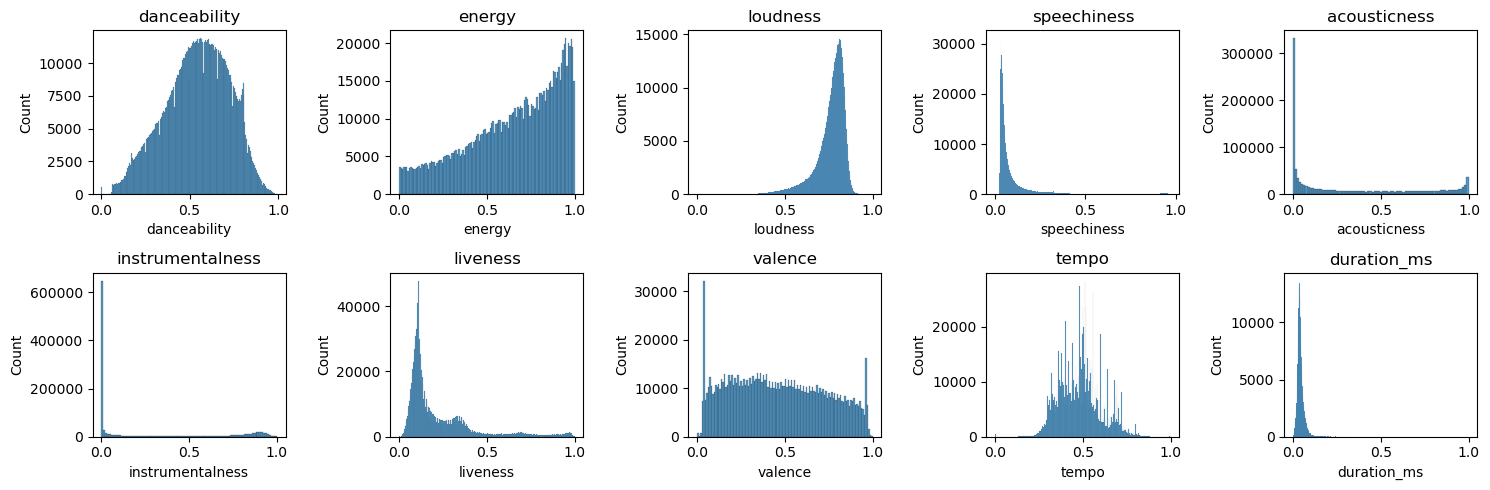

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5)) 

for i, col in enumerate(floats[1:]):
    ax = axes[i // 5, i % 5]  
    sns.histplot(df[col], ax=ax)
    ax.set_title(col)  

plt.tight_layout()  
plt.show()